In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import datetime as datetime

In [2]:
df = pd.read_csv('sources/house-data.csv')
df.head()

,Index,distict_name,member,party,prior_experience,education,assumed_office,residence,born
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)"
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)"
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)"
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)"
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)"


In [3]:
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]






In [4]:
states_df = pd.DataFrame(states, columns=['name'])
states_df

,name
0,Alaska
1,Alabama
2,Arkansas
3,Arizona
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [87]:
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
district,object
name,object
party,object
prior_experience,object
education,object
assumed_office,object
residence,object
born,object
clean_born,object
age,int64


In [27]:
df.columns

Index(['Index', 'district', 'name', 'party', 'prior_experience', 'education',
       'assumed_office', 'residence', 'born', 'clean_born', 'age'],
      dtype='object')

In [7]:
df.rename(columns={'distict_name': 'district'}, inplace=True)

In [26]:
df.rename(columns={'member': 'name'}, inplace=True)

In [9]:
#remove trailing space in column names
df.columns = df.columns.str.rstrip()

In [10]:
#how many rows
df.shape[0]

435

In [11]:
#how many rows missing data
df.isnull().sum().sort_values(ascending=False)

member              4
party               4
prior_experience    4
education           4
assumed_office      4
residence           4
born                4
Index               0
district            0
dtype: int64

In [13]:
df['clean_born'] = df['born'].astype('|S')

In [14]:
df['clean_born'] = df['clean_born'].astype('str')

In [15]:
df.head()

,Index,district,member,party,prior_experience,education,assumed_office,residence,born,clean_born
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)","b'June 17, 1958 (age 64)'"
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)","b'September 26, 1966 (age 55)'"
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)","b'July 16, 1958 (age 64)'"
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)","b'July 22, 1965 (age 57)'"
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)","b'April 29, 1954 (age 68)'"


In [16]:
df['clean_born'] = df['born'].str.split('(').str[0]
df[['born', 'clean_born']].head()

,born,clean_born
0,"June 17, 1958 (age 64)","June 17, 1958"
1,"September 26, 1966 (age 55)","September 26, 1966"
2,"July 16, 1958 (age 64)","July 16, 1958"
3,"July 22, 1965 (age 57)","July 22, 1965"
4,"April 29, 1954 (age 68)","April 29, 1954"


In [17]:
df['clean_born'] = pd.to_datetime(df['clean_born'])

In [18]:
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
Index,int64
district,object
member,object
party,object
prior_experience,object
education,object
assumed_office,object
residence,object
born,object
clean_born,datetime64[ns]


In [19]:
#function to calculate age based on birthdate
def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [20]:
#apply age function
df['age'] = df['clean_born'].apply(calculate_age)
df.head()

,Index,district,member,party,prior_experience,education,assumed_office,residence,born,clean_born,age
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64.0
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55.0
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64.0
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57.0
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68.0


In [21]:
df['age'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: age, dtype: bool

In [22]:
df['age']=pd.to_numeric(df['age'])
df.head()

,Index,district,member,party,prior_experience,education,assumed_office,residence,born,clean_born,age
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17,64.0
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26,55.0
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16,64.0
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22,57.0
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29,68.0


In [23]:
#check for null values and replace
df[df['residence'].isnull()]

,Index,district,member,party,prior_experience,education,assumed_office,residence,born,clean_born,age
7,8,Alaska at-large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
212,213,Minnesota 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
275,276,New York 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
279,280,New York 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [38]:
df.isnull().sum().sort_values(ascending=False)

Index               0
district            0
name                0
party               0
prior_experience    0
education           0
assumed_office      0
residence           0
born                0
clean_born          0
age                 0
dtype: int64

In [28]:
df["name"].fillna("None", inplace=True)

In [29]:
df["party"].fillna("None", inplace=True)

In [30]:
df["residence"].fillna("None", inplace=True)

In [31]:
df["prior_experience"].fillna("None", inplace=True)

In [32]:
df["education"].fillna("None", inplace=True)

In [33]:
df["assumed_office"].fillna(0, inplace=True)

In [34]:
df["born"].fillna(0, inplace=True)

In [35]:
df["clean_born"].fillna(0, inplace=True)

In [36]:
df["age"].fillna(0, inplace=True)

In [37]:
df[df['age'].isnull()]

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age


In [39]:
#remove trailing zeros from age column
def round_age(age):
    return int(round(age))

In [40]:
df['age'] = df['age'].apply(round_age)
df.head()

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age
0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17 00:00:00,64
1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26 00:00:00,55
2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16 00:00:00,64
3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22 00:00:00,57
4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29 00:00:00,68


In [41]:
s='|'.join(states)
print(s)

Alaska|Alabama|Arkansas|Arizona|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Iowa|Idaho|Illinois|Indiana|Kansas|Kentucky|Louisiana|Massachusetts|Maryland|Maine|Michigan|Minnesota|Missouri|Mississippi|Montana|North Carolina|North Dakota|Nebraska|New Hampshire|New Jersey|New Mexico|Nevada|New York|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Virginia|Vermont|Washington|Wisconsin|West Virginia|Wyoming


In [42]:
df['test_state']=df.district.str.findall(s)
df.sample()

,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state
251,252,New Jersey 10,Donald Payne Jr.,Democratic,Essex County,Kean University,2012 (special),Newark,"December 17, 1958 (age 63)",1958-12-17 00:00:00,63,[New Jersey]


In [ ]:
def group_state(district):
    for i in states:
    return df.

In [43]:
df.reset_index(inplace = True)
df.head()

,index,Index,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state
0,0,1,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17 00:00:00,64,[Alabama]
1,1,2,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26 00:00:00,55,[Alabama]
2,2,3,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16 00:00:00,64,[Alabama]
3,3,4,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22 00:00:00,57,[Alabama]
4,4,5,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29 00:00:00,68,[Alabama]


In [45]:
df.drop('index', inplace=True, axis=1)

In [46]:
df.head()

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17 00:00:00,64,[Alabama]
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26 00:00:00,55,[Alabama]
2,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16 00:00:00,64,[Alabama]
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22 00:00:00,57,[Alabama]
4,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29 00:00:00,68,[Alabama]


In [94]:
df['clean_state'] = df['test_state'].str[0]
df.head()

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,test_state,age_range,clean_state
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17 00:00:00,64,[Alabama],55-64,Alabama
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26 00:00:00,55,[Alabama],45-54,Alabama
2,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16 00:00:00,64,[Alabama],55-64,Alabama
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22 00:00:00,57,[Alabama],55-64,Alabama
4,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29 00:00:00,68,[Alabama],65-74,Alabama


In [95]:
df.drop('test_state', inplace=True, axis=1)

In [62]:
mybins=[25,35,45,55,65,75,85,100]

# Create some labels for the new variable
mylabels=['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
# Use the .cut method to create a new variable using those cut points and labels.
df['age_range']=pd.cut(df['age'], bins=mybins, labels=mylabels)
# Check it out!
df[['age', 'age_range']].sample()

,age,age_range
360,73,65-74


In [106]:
df.head()

,district,name,party,prior_experience,education,assumed_office,residence,born,clean_born,age,age_range,clean_state
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,"June 17, 1958 (age 64)",1958-06-17 00:00:00,64,55-64,Alabama
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)\nAubur...,2021,Enterprise,"September 26, 1966 (age 55)",1966-09-26 00:00:00,55,45-54,Alabama
2,Alabama 3,Mike Rogers,Republican,Alabama House of Representatives,"Jacksonville State University (BA, MPA)\nBirmi...",2003,Anniston,"July 16, 1958 (age 64)",1958-07-16 00:00:00,64,55-64,Alabama
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North Alabama\nBirmingham–Southe...,1997,Haleyville,"July 22, 1965 (age 57)",1965-07-22 00:00:00,57,55-64,Alabama
4,Alabama 5,Mo Brooks,Republican,Madison County Commissioner,Duke University (BA)\nUniversity of Alabama (JD),2011,Huntsville,"April 29, 1954 (age 68)",1954-04-29 00:00:00,68,65-74,Alabama


In [70]:
df2 = df.groupby(['age_range', 'party'])['name'].count()
df2 = df2.unstack(level=-1)
df2.reset_index(level=0, inplace=True)
df2.head(25)

party,age_range,Democratic,None,Republican
0,25-34,6,0,5
1,35-44,25,0,33
2,45-54,41,0,43
3,55-64,58,0,79
4,65-74,64,0,46
5,75-84,25,0,5
6,85+,1,0,0


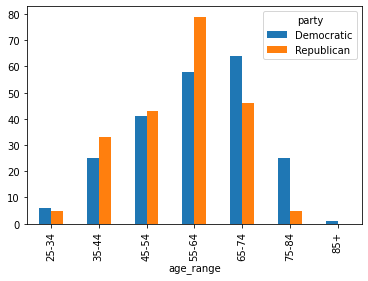

In [71]:
df2.plot(x='age_range', y=['Democratic', 'Republican'], kind='bar');

In [107]:
df.to_csv('../us-house-117.csv')

In [81]:
df2 = df.groupby(['age_range', 'party'])['name'].count()
df2 = df2.unstack(level=-1)
df2.head(25)

party,Democratic,None,Republican
age_range,,,
25-34,6,0,5
35-44,25,0,33
45-54,41,0,43
55-64,58,0,79
65-74,64,0,46
75-84,25,0,5
85+,1,0,0


In [104]:
df3 = df[df['clean_state'] == 'New York'].groupby(['age_range', 'party'])['name'].count()
df3 = df3.unstack(level=-1)
df3.reset_index(level=0, inplace=True)
df3.head(25)

party,age_range,Democratic,None,Republican
0,25-34,3,0,0
1,35-44,0,0,4
2,45-54,3,0,1
3,55-64,6,0,2
4,65-74,5,0,0
5,75-84,1,0,0
6,85+,0,0,0


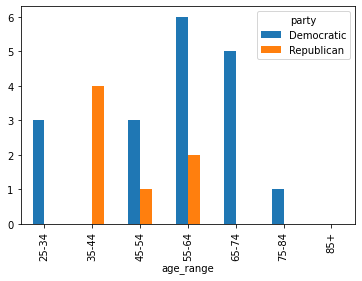

In [105]:
df3.plot(x='age_range', y=['Democratic', 'Republican'], kind='bar');